In [77]:
import cv2

# Load video
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")
else:
    print("Video loaded successfully.")


Video loaded successfully.


In [79]:
import cv2
import os

# Load video
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")

frame_count = 0

# Create a folder to store the extracted frames (if it doesn't exist)
output_folder = "output_frames"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Extract frames and save them in the folder
while True:
    ret, frame = cap.read()  # Read the next frame
    if not ret:
        break
    
    frame_count += 1
    
    # Save frame as image file in the folder
    frame_name = os.path.join(output_folder, f"frame_{frame_count}.jpg")
    cv2.imwrite(frame_name, frame)

cap.release()  # Release video object
print(f"Extracted {frame_count} frames and saved them into folder '{output_folder}'.")


Extracted 840 frames and saved them into folder 'output_frames'.


In [81]:
#Spatio-Temporal Segmentation:
#Perform segmentation on each frame using a technique like color thresholding or edge detection.
import cv2
import os
import numpy as np

# Path to the video file
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4' 

# Directories for saving extracted and segmented frames
output_dir_extracted = "extracted_frames"
output_dir_segmented = "segmented_frames"

# Create directories if they don't exist
if not os.path.exists(output_dir_extracted):
    os.makedirs(output_dir_extracted)
if not os.path.exists(output_dir_segmented):
    os.makedirs(output_dir_segmented)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video file")
    exit()

# Define the color range for segmentation (HSV format)
lower_color = np.array([40, 40, 40])   # Lower bound (example: green)
upper_color = np.array([70, 255, 255]) # Upper bound (example: green)

frame_count = 0

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        # Save the extracted frame
        frame_filename = os.path.join(output_dir_extracted, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved extracted frame: {frame_filename}")
        
        # Convert the frame to HSV for color thresholding
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Apply color thresholding
        mask = cv2.inRange(hsv_frame, lower_color, upper_color)
        segmented_frame = cv2.bitwise_and(frame, frame, mask=mask)
        
        # Convert to grayscale for edge detection
        gray_frame = cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2GRAY)
        
        # Apply Canny edge detection
        edges = cv2.Canny(gray_frame, 100, 200)
        
        # Save the segmented frame (edges and color segmentation)
        segmented_filename = os.path.join(output_dir_segmented, f"segmented_{frame_count:04d}.jpg")
        cv2.imwrite(segmented_filename, edges)
        print(f"Saved segmented frame with edge detection: {segmented_filename}")
        
        frame_count += 1
    else:
        break

# Release the video capture object
cap.release()
print(f"Processed {frame_count} frames. Extracted frames saved in '{output_dir_extracted}', segmented frames saved in '{output_dir_segmented}'.")

Saved extracted frame: extracted_frames\frame_0000.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0000.jpg
Saved extracted frame: extracted_frames\frame_0001.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0001.jpg
Saved extracted frame: extracted_frames\frame_0002.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0002.jpg
Saved extracted frame: extracted_frames\frame_0003.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0003.jpg
Saved extracted frame: extracted_frames\frame_0004.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0004.jpg
Saved extracted frame: extracted_frames\frame_0005.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0005.jpg
Saved extracted frame: extracted_frames\frame_0006.jpg
Saved segmented frame with edge detection: segmented_frames\segmented_0006.jpg
Saved extracted frame: extracted_frames\frame_0007.jpg
Saved s

In [83]:
#Track the segmented objects across frames to observe changes in motion and shape.
import cv2
import os
import numpy as np

# Path to the video file
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4' 

# Directories for saving segmented frames
output_dir_segmented = "tracked_frames"

# Create directory for saving tracked frames
if not os.path.exists(output_dir_segmented):
    os.makedirs(output_dir_segmented)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Define the color range for segmentation (HSV format)
lower_color = np.array([40, 40, 40])   # Example for green
upper_color = np.array([70, 255, 255]) # Example for green

frame_count = 0

# To store object centroids across frames for tracking
previous_centroids = []

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        # Convert the frame to HSV for color thresholding
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Apply color thresholding
        mask = cv2.inRange(hsv_frame, lower_color, upper_color)
        segmented_frame = cv2.bitwise_and(frame, frame, mask=mask)
        
        # Convert to grayscale for contour detection
        gray_frame = cv2.cvtColor(segmented_frame, cv2.COLOR_BGR2GRAY)
        
        # Apply a threshold to get binary image (for contour detection)
        _, thresh = cv2.threshold(gray_frame, 50, 255, cv2.THRESH_BINARY)
        
        # Find contours of the segmented objects
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        current_centroids = []

        # Loop over each contour
        for contour in contours:
            # Ignore small areas to filter out noise
            if cv2.contourArea(contour) > 500:
                # Get bounding box coordinates
                x, y, w, h = cv2.boundingRect(contour)
                
                # Draw bounding box around the object
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                
                # Calculate centroid of the object
                M = cv2.moments(contour)
                if M['m00'] != 0:
                    cx = int(M['m10'] / M['m00'])
                    cy = int(M['m01'] / M['m00'])
                    current_centroids.append((cx, cy))

                    # Draw the centroid
                    cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)
                
                # Track changes in the bounding box (size)
                bounding_box_area = w * h
                cv2.putText(frame, f"Area: {bounding_box_area}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Track centroid motion across frames
        if previous_centroids:
            for prev_cx, prev_cy in previous_centroids:
                # Draw lines to track movement from previous to current centroid
                for curr_cx, curr_cy in current_centroids:
                    cv2.line(frame, (prev_cx, prev_cy), (curr_cx, curr_cy), (255, 0, 0), 2)

        # Update previous centroids for the next frame
        previous_centroids = current_centroids

        # Save the frame with bounding boxes and motion tracking
        output_frame_path = os.path.join(output_dir_segmented, f"tracked_{frame_count:04d}.jpg")
        cv2.imwrite(output_frame_path, frame)

        print(f"Processed frame {frame_count}: tracked objects and saved to {output_frame_path}")
        
        frame_count += 1
    else:
        break

# Release the video capture object
cap.release()
print(f"Tracking completed. Processed {frame_count} frames.")

Processed frame 0: tracked objects and saved to tracked_frames\tracked_0000.jpg
Processed frame 1: tracked objects and saved to tracked_frames\tracked_0001.jpg
Processed frame 2: tracked objects and saved to tracked_frames\tracked_0002.jpg
Processed frame 3: tracked objects and saved to tracked_frames\tracked_0003.jpg
Processed frame 4: tracked objects and saved to tracked_frames\tracked_0004.jpg
Processed frame 5: tracked objects and saved to tracked_frames\tracked_0005.jpg
Processed frame 6: tracked objects and saved to tracked_frames\tracked_0006.jpg
Processed frame 7: tracked objects and saved to tracked_frames\tracked_0007.jpg
Processed frame 8: tracked objects and saved to tracked_frames\tracked_0008.jpg
Processed frame 9: tracked objects and saved to tracked_frames\tracked_0009.jpg
Processed frame 10: tracked objects and saved to tracked_frames\tracked_0010.jpg
Processed frame 11: tracked objects and saved to tracked_frames\tracked_0011.jpg
Processed frame 12: tracked objects an

In [86]:
import cv2
import os

# Path to the video file
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4' 

# Directories for saving foreground and background frames
output_dir_foreground = "foreground_frames"
output_dir_background = "background_frames"

# Create directories if they don't exist
if not os.path.exists(output_dir_foreground):
    os.makedirs(output_dir_foreground)
if not os.path.exists(output_dir_background):
    os.makedirs(output_dir_background)

# Create a background subtractor object
back_sub = cv2.createBackgroundSubtractorMOG2()

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_count = 0

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        # Apply the background subtractor to get the foreground mask
        fg_mask = back_sub.apply(frame)

        # Apply thresholding to the mask to binarize it
        _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

        # Optionally apply morphological operations to remove noise
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

        # Save the foreground mask frame
        fg_mask_filename = os.path.join(output_dir_foreground, f"foreground_{frame_count:04d}.jpg")
        cv2.imwrite(fg_mask_filename, fg_mask)

        # Save the original frame with mask overlay for visualization
        colored_foreground = cv2.bitwise_and(frame, frame, mask=fg_mask)
        background_filename = os.path.join(output_dir_background, f"background_{frame_count:04d}.jpg")
        cv2.imwrite(background_filename, colored_foreground)

        print(f"Processed frame {frame_count}: saved foreground mask and background overlay.")
        
        frame_count += 1
    else:
        break

# Release the video capture object
cap.release()
print(f"Foreground-background segmentation completed. Processed {frame_count} frames.")

Processed frame 0: saved foreground mask and background overlay.
Processed frame 1: saved foreground mask and background overlay.
Processed frame 2: saved foreground mask and background overlay.
Processed frame 3: saved foreground mask and background overlay.
Processed frame 4: saved foreground mask and background overlay.
Processed frame 5: saved foreground mask and background overlay.
Processed frame 6: saved foreground mask and background overlay.
Processed frame 7: saved foreground mask and background overlay.
Processed frame 8: saved foreground mask and background overlay.
Processed frame 9: saved foreground mask and background overlay.
Processed frame 10: saved foreground mask and background overlay.
Processed frame 11: saved foreground mask and background overlay.
Processed frame 12: saved foreground mask and background overlay.
Processed frame 13: saved foreground mask and background overlay.
Processed frame 14: saved foreground mask and background overlay.
Processed frame 15: 

In [88]:
import cv2
import os

# Load video
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Couldn't open video.")

# Create a folder to store highlighted scene cut frames
output_folder = "highlighted_scene_cuts"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

frame_idx = 0

# Loop through the video to find and save scene cut frames
for scene_cut in scene_cuts:
    while True:
        ret, frame = cap.read()
        if not ret or frame_idx == scene_cut:
            break
        
        frame_idx += 1

    if frame_idx == scene_cut:
        # Mark the frame with a red rectangle
        marked_frame = cv2.rectangle(frame.copy(), (10, 10), (200, 200), (0, 0, 255), 3)

        # Save the marked frame in the folder
        frame_name = os.path.join(output_folder, f"scene_cut_frame_{frame_idx}.jpg")
        cv2.imwrite(frame_name, marked_frame)
        print(f"Saved highlighted frame at scene cut {frame_idx} to {frame_name}")

cap.release()
print(f"Saved all highlighted frames to folder '{output_folder}'")


Saved highlighted frame at scene cut 10 to highlighted_scene_cuts\scene_cut_frame_10.jpg
Saved highlighted frame at scene cut 220 to highlighted_scene_cuts\scene_cut_frame_220.jpg
Saved highlighted frame at scene cut 570 to highlighted_scene_cuts\scene_cut_frame_570.jpg
Saved highlighted frame at scene cut 710 to highlighted_scene_cuts\scene_cut_frame_710.jpg
Saved highlighted frame at scene cut 800 to highlighted_scene_cuts\scene_cut_frame_800.jpg
Saved all highlighted frames to folder 'highlighted_scene_cuts'


In [90]:
import os
from moviepy.editor import VideoFileClip
from PIL import Image, ImageFilter
import numpy as np

# Function to extract frames and apply noise reduction
def extract_frames(video_path, fps=1, blur_radius=2):
    video = VideoFileClip(video_path)
    frames = []
    for i, frame in enumerate(video.iter_frames(fps=fps, dtype='uint8')):
        img = Image.fromarray(frame)
        img = img.filter(ImageFilter.GaussianBlur(blur_radius))
        frames.append(np.array(img.convert('HSV')))
    video.close()
    return frames

# Function to compute histogram for an image
def compute_histogram(image):
    histogram = image.histogram()
    histogram = np.array(histogram) / sum(histogram)
    return histogram

# Function to compare histograms
def histogram_similarity(hist1, hist2):
    return np.sum(np.minimum(hist1, hist2))

# Function to detect scene cuts based on similarity score
def detect_scene_cuts(frames, threshold=0.1):
    histograms = [compute_histogram(Image.fromarray(frame)) for frame in frames]
    scene_cuts = []

    for i in range(len(histograms) - 1):
        score = histogram_similarity(histograms[i], histograms[i + 1])
        if score < threshold:
            scene_cuts.append(i + 1)  # Scene cut detected at frame i + 1

    return scene_cuts

# Example usage
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'  # Path to your video file
output_folder = 'SceneCuts'      # Folder to save scene cut frames

# Extract frames
frames = extract_frames(video_path, fps=1, blur_radius=2)

# Detect scene cuts
scene_cuts = detect_scene_cuts(frames, threshold=0.1)

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save scene cut frames
for i in scene_cuts:
    cut_frame = Image.fromarray(frames[i])
    cut_frame.save(f"{output_folder}/scene_cut_frame_{i:04d}.png")

print(f"Scene cuts detected at frames: {scene_cuts}")


Scene cuts detected at frames: []


In [92]:
import os
from moviepy.editor import VideoFileClip
from PIL import Image, ImageDraw, ImageFilter
import numpy as np

# Function to extract frames and apply noise reduction
def extract_frames(video_path, fps=1, blur_radius=2):
    video = VideoFileClip(video_path)
    frames = []
    for i, frame in enumerate(video.iter_frames(fps=fps, dtype='uint8')):
        img = Image.fromarray(frame)
        img = img.filter(ImageFilter.GaussianBlur(blur_radius))
        frames.append(np.array(img.convert('HSV')))
    video.close()
    return frames

# Function to compute histogram for an image
def compute_histogram(image):
    histogram = image.histogram()
    histogram = np.array(histogram) / sum(histogram)
    return histogram

# Function to compare histograms
def histogram_similarity(hist1, hist2):
    return np.sum(np.minimum(hist1, hist2))

# Function to detect scene cuts based on similarity score
def detect_scene_cuts(frames, threshold=0.1):
    histograms = [compute_histogram(Image.fromarray(frame)) for frame in frames]
    scene_cuts = []

    for i in range(len(histograms) - 1):
        score = histogram_similarity(histograms[i], histograms[i + 1])
        if score < threshold:
            scene_cuts.append(i + 1)  # Scene cut detected at frame i + 1

    return scene_cuts

# Function to highlight the scene cut frames
def highlight_scene_cut(frame, cut_index):
    img = Image.fromarray(frame)
    draw = ImageDraw.Draw(img)
    width, height = img.size
    # Draw a rectangle around the frame (you can adjust the coordinates as needed)
    draw.rectangle([0, 0, width, height], outline="red", width=5)
    return img

# Example usage
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'  # Path to your video file
output_folder = 'SceneCuts'      # Folder to save scene cut frames

# Extract frames
frames = extract_frames(video_path, fps=1, blur_radius=2)

# Detect scene cuts
scene_cuts = detect_scene_cuts(frames, threshold=0.1)

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save highlighted scene cut frames
for i in scene_cuts:
    highlighted_frame = highlight_scene_cut(frames[i], i)
    highlighted_frame.save(f"{output_folder}/highlighted_scene_cut_frame_{i:04d}.png")

print(f"Scene cuts detected and highlighted at frames: {scene_cuts}")


Scene cuts detected and highlighted at frames: []


In [94]:
import cv2
import os
import numpy as np

# Path to the video file
video_path =  r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4' 

# Directory to save frames with detected cuts
output_dir_cuts = "marked_scene_cuts"
if not os.path.exists(output_dir_cuts):
    os.makedirs(output_dir_cuts)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the first frame
ret, prev_frame = cap.read()
if not ret:
    print("Failed to read video.")
    cap.release()
    exit()

# Convert the first frame to HSV color space and calculate its histogram
prev_frame_hsv = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2HSV)
prev_hist = cv2.calcHist([prev_frame_hsv], [0, 1], None, [16, 16], [0, 180, 0, 256])
cv2.normalize(prev_hist, prev_hist)

frame_count = 1
cut_frames = []

# Process each frame
while True:
    ret, curr_frame = cap.read()

    if not ret:
        break

    # Convert current frame to HSV and calculate its histogram
    curr_frame_hsv = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2HSV)
    curr_hist = cv2.calcHist([curr_frame_hsv], [0, 1], None, [16, 16], [0, 180, 0, 256])
    cv2.normalize(curr_hist, curr_hist)

    # Compare histograms using correlation
    correlation = cv2.compareHist(prev_hist, curr_hist, cv2.HISTCMP_CORREL)

    # If the correlation is below a certain threshold, it indicates a scene cut
    threshold = 0.5  # Adjust this value based on your needs
    if correlation < threshold:
        print(f"Scene cut detected between frames {frame_count - 1} and {frame_count}")
        cut_frames.append(frame_count)

        # Draw a rectangle or overlay text on the current frame to mark the cut
        cv2.rectangle(curr_frame, (10, 10), (200, 50), (0, 0, 255), -1)  # Rectangle on the top left
        cv2.putText(curr_frame, "Scene Cut Detected", (15, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Update previous frame and histogram for the next iteration
    prev_frame_hsv = curr_frame_hsv
    prev_hist = curr_hist

    # Save the marked frame
    marked_frame_path = os.path.join(output_dir_cuts, f"marked_{frame_count:04d}.jpg")
    cv2.imwrite(marked_frame_path, curr_frame)

    frame_count += 1

# Release the video capture object
cap.release()

# Create a summary report of detected scene cuts
summary_file_path = "scene_cut_summary.txt"
with open(summary_file_path, 'w') as summary_file:
    summary_file.write("Detected Scene Cuts:\n")
    summary_file.write("====================\n")
    for frame in cut_frames:
        summary_file.write(f"Scene cut at frame: {frame}\n")

print(f"Marked scene cuts detection completed. Detected cuts at frames: {cut_frames}.")
print(f"Summary report saved to: {summary_file_path}.")

Marked scene cuts detection completed. Detected cuts at frames: [].
Summary report saved to: scene_cut_summary.txt.


In [96]:
 import cv2
import os
import numpy as np

# Path to the video file
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'

# Directory to save frames with detected cuts
output_dir_cuts = "marked_scene_cuts"
if not os.path.exists(output_dir_cuts):
    os.makedirs(output_dir_cuts)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file.")
    exit()

# Read the first frame and initialize variables
ret, prev_frame = cap.read()
if not ret:
    print("Failed to read video.")
    cap.release()
    exit()

prev_frame_hsv = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2HSV)
prev_hist = cv2.calcHist([prev_frame_hsv], [0, 1], None, [16, 16], [0, 180, 0, 256])
cv2.normalize(prev_hist, prev_hist)

frame_count = 1
cut_frames = []

# Process each frame
while True:
    ret, curr_frame = cap.read()
    if not ret:
        break

    # Convert current frame to HSV and calculate its histogram
    curr_frame_hsv = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2HSV)
    curr_hist = cv2.calcHist([curr_frame_hsv], [0, 1], None, [16, 16], [0, 180, 0, 256])
    cv2.normalize(curr_hist, curr_hist)

    # Compare histograms using correlation
    correlation = cv2.compareHist(prev_hist, curr_hist, cv2.HISTCMP_CORREL)

    # If the correlation is below a certain threshold, it indicates a scene cut
    threshold = 0.5  # Adjust this value based on your needs
    if correlation < threshold:
        print(f"Scene cut detected at frame {frame_count}")
        cut_frames.append(frame_count)

        # Draw a rectangle or overlay text on the current frame to mark the cut
        cv2.rectangle(curr_frame, (10, 10), (200, 50), (0, 0, 255), -1)  # Rectangle on the top left
        cv2.putText(curr_frame, "Scene Cut Detected", (15, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Perform segmentation on the marked frame (example: color thresholding)
        # Here, we'll apply a simple color threshold to extract the red color
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([10, 255, 255])
        mask = cv2.inRange(curr_frame_hsv, lower_red, upper_red)

        # Bitwise-AND mask and original image to get the segmented result
        segmented_result = cv2.bitwise_and(curr_frame, curr_frame, mask=mask)

        # Display the marked frame and segmented result
        cv2.imshow(f"Marked Frame {frame_count}", curr_frame)
        cv2.imshow(f"Segmented Result for Frame {frame_count}", segmented_result)

        # Save marked frame to disk
        marked_frame_path = os.path.join(output_dir_cuts, f"marked_{frame_count:04d}.jpg")
        cv2.imwrite(marked_frame_path, curr_frame)

    # Update previous frame and histogram for the next iteration
    prev_frame_hsv = curr_frame_hsv
    prev_hist = curr_hist
    frame_count += 1

# Release the video capture object
cap.release()

# Create a summary report of detected scene cuts
summary_file_path = "scene_cut_summary.txt"
with open(summary_file_path, 'w') as summary_file:
    summary_file.write("Detected Scene Cuts:\n")
    summary_file.write("====================\n")
    for frame in cut_frames:
        summary_file.write(f"Scene cut at frame: {frame}\n")

print(f"Marked scene cuts detection completed. Detected cuts at frames: {cut_frames}.")
print(f"Summary report saved to: {summary_file_path}.")

# Wait for a key press before closing the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


Marked scene cuts detection completed. Detected cuts at frames: [].
Summary report saved to: scene_cut_summary.txt.


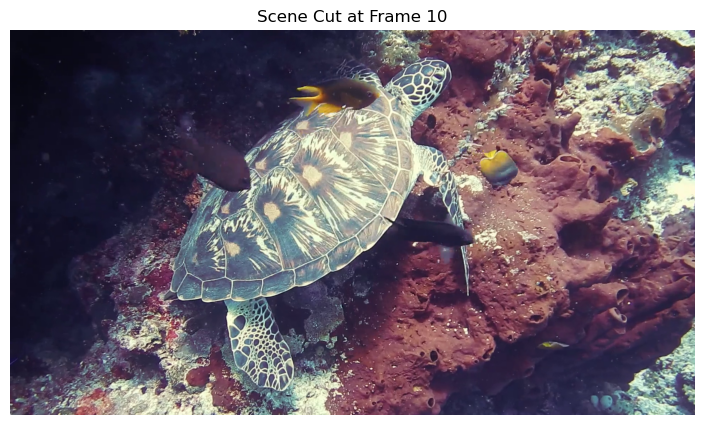

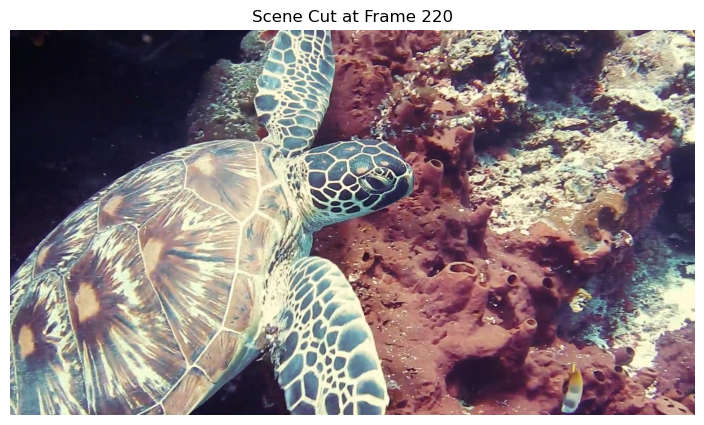

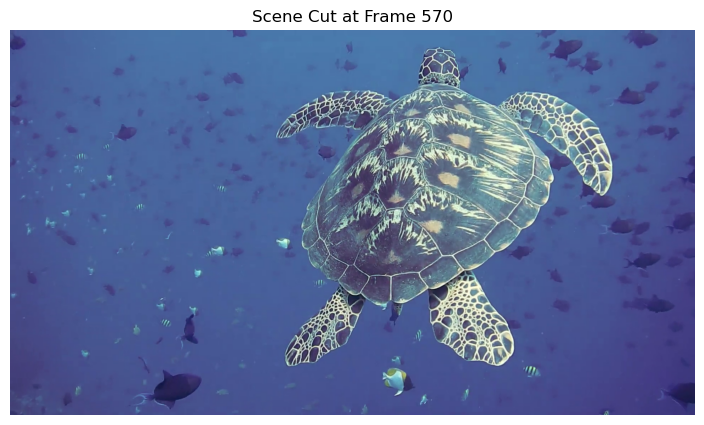

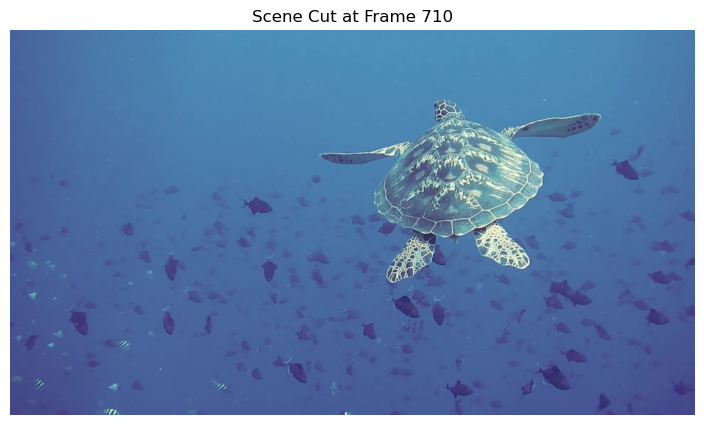

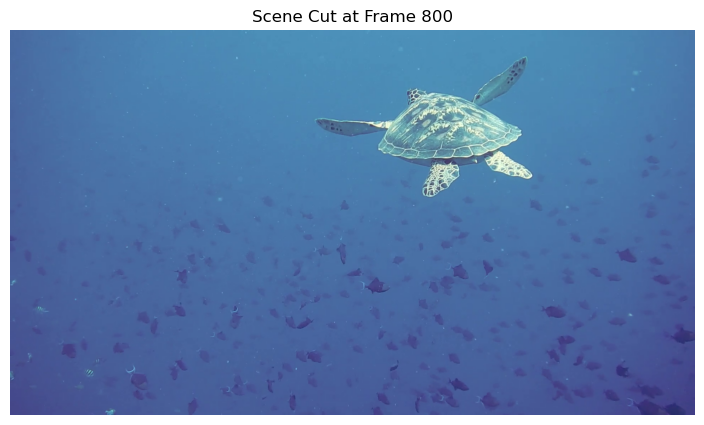

In [98]:
import cv2
import matplotlib.pyplot as plt

# Path to the video file
video_path = r'C:\Users\SVSV\Downloads\1456996-hd_1920_1080_30fps.mp4'

# List of detected scene cuts (this should be defined based on previous code)
scene_cuts = [10, 220, 570, 710, 800]  # Replace with your detected scene cut frames

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file.")
    exit()

# Iterate through each scene cut and display the corresponding frame
for scene_cut in scene_cuts:
    # Set the video to the scene cut frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_cut)  # Move to the specific frame
    ret, frame = cap.read()  # Read the frame

    if ret:
        # Display the frame using Matplotlib
        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        plt.title(f"Scene Cut at Frame {scene_cut}")
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        print(f"Failed to read frame at scene cut {scene_cut}")

# Release the video capture object
cap.release()
